In [100]:
import yfinance as yf
import pandas as pd

# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

import datetime as dt
from datetime import timedelta

from matplotlib import pyplot as plt

import json
import os

In [101]:
# parameters for API call
start = start = dt.datetime(2010,12,1)
end = dt.datetime(2020,2,29)
ticker = 'NG=F' # 

In [102]:
# API request
df = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed


In [103]:
# rename adjusted close column
df = df.rename(columns={"Adj Close":'Adj_Close'})
df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2010-12-01,4.196,4.324,4.164,4.269,4.269,118741
2010-12-02,4.310,4.377,4.197,4.343,4.343,135776
2010-12-03,4.341,4.391,4.280,4.349,4.349,86975
2010-12-06,4.385,4.540,4.328,4.488,4.488,151475
2010-12-07,4.500,4.545,4.383,4.393,4.393,155154
...,...,...,...,...,...,...
2020-02-24,1.884,1.884,1.824,1.827,1.827,75204
2020-02-25,1.836,1.862,1.819,1.847,1.847,70528
2020-02-26,1.848,1.880,1.810,1.821,1.821,163415


In [104]:
# https://stackoverflow.com/questions/40256338/calculating-average-true-range-atr-on-ohlc-data-with-python
# fifth answer
days = 5
# calculate Average True Range over length of dataset
ATR = pd.concat([df.High.sub(df.Low), df.High.sub(df.Adj_Close.shift()), df.Low.sub(df.Adj_Close.shift())], axis=1).max(1).ewm(span=days).mean()

In [105]:
ATR = pd.DataFrame(ATR)
ATR

,0
Date,
2010-12-01,0.160000
2010-12-02,0.172000
2010-12-03,0.143105
2010-12-06,0.171723
2010-12-07,0.167990
...,...
2020-02-24,0.072027
2020-02-25,0.062352
2020-02-26,0.064901


KeyError: (slice(None, None, None), None)

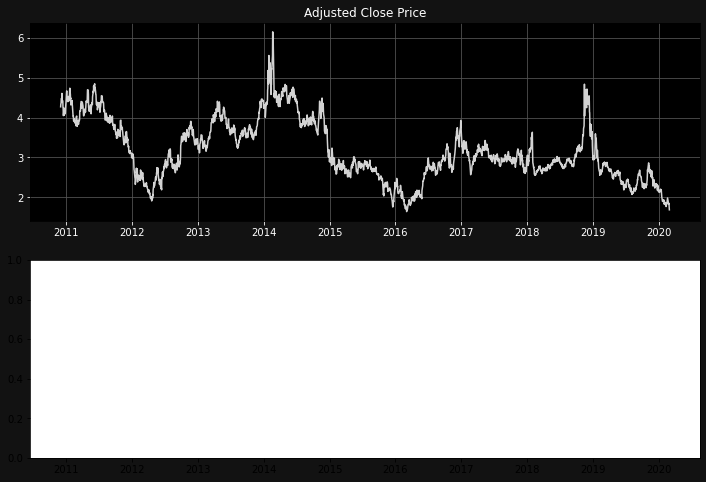

In [106]:
####### plot NG price and ATR over length of timeframe ########

plt.figure(figsize=(12,8))

## natural gas futures prices plot
ax1 = plt.subplot(211)
ax1.plot(df.index, df['Adj_Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color ="white")

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')


# 14 day ATR plot
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(df.index, ATR, color='white')



ax2.set_title(f'Average True Range({days})', color='white')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')


##################

plt.show()

In [107]:
# merge ATR data to price dataframe
merged_df = pd.concat([df, ATR], axis=1)


In [108]:
# rename 0 column to 'ATR'
merged_df.rename(columns={0:'ATR'}, inplace=True)

In [109]:
# final merged df
merged_df

,Open,High,Low,Close,Adj_Close,Volume,ATR
Date,,,,,,,
2010-12-01,4.196,4.324,4.164,4.269,4.269,118741,0.160000
2010-12-02,4.310,4.377,4.197,4.343,4.343,135776,0.172000
2010-12-03,4.341,4.391,4.280,4.349,4.349,86975,0.143105
2010-12-06,4.385,4.540,4.328,4.488,4.488,151475,0.171723
2010-12-07,4.500,4.545,4.383,4.393,4.393,155154,0.167990
...,...,...,...,...,...,...,...
2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.072027
2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.062352
2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.064901


In [110]:
# making index a 'Date' column
    # simplifies filtering by date in following steps
merged_df = merged_df.reset_index()


In [111]:
merged_df

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
0,2010-12-01,4.196,4.324,4.164,4.269,4.269,118741,0.160000
1,2010-12-02,4.310,4.377,4.197,4.343,4.343,135776,0.172000
2,2010-12-03,4.341,4.391,4.280,4.349,4.349,86975,0.143105
3,2010-12-06,4.385,4.540,4.328,4.488,4.488,151475,0.171723
4,2010-12-07,4.500,4.545,4.383,4.393,4.393,155154,0.167990
...,...,...,...,...,...,...,...,...
2319,2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.072027
2320,2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.062352
2321,2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.064901
2322,2020-02-27,1.828,1.831,1.719,1.752,1.752,276100,0.080601


In [112]:
# build list of years in timeframe
years = [year for year in range(2010,2020)]
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [113]:
# combine all winter data into single dataframe
filtered_df = pd.DataFrame()

for year in years:
    winter_df = merged_df.loc[(merged_df['Date'] >= f'{year}-12-01') & (merged_df['Date'] <f'{year+1}-03-01')]
    filtered_df = pd.concat([filtered_df, winter_df])

In [114]:
filtered_df

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
0,2010-12-01,4.196,4.324,4.164,4.269,4.269,118741,0.160000
1,2010-12-02,4.310,4.377,4.197,4.343,4.343,135776,0.172000
2,2010-12-03,4.341,4.391,4.280,4.349,4.349,86975,0.143105
3,2010-12-06,4.385,4.540,4.328,4.488,4.488,151475,0.171723
4,2010-12-07,4.500,4.545,4.383,4.393,4.393,155154,0.167990
...,...,...,...,...,...,...,...,...
2319,2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.072027
2320,2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.062352
2321,2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.064901
2322,2020-02-27,1.828,1.831,1.719,1.752,1.752,276100,0.080601


In [115]:
# export dataframe above in CSV file
# filtered_df.to_csv('winter_NG_data.csv', index=False)


In [116]:
######################## build sub-datasets for each year ############################

In [117]:
############ 2011 - 2012 #############

In [118]:
# price and ATR data for 2011-12-01 - 2012-02-29
winter_11_12 = merged_df.loc[(merged_df['Date'] >= '2011-12-01') & (merged_df['Date'] < '2012-03-01')]
winter_11_12

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
253,2011-12-01,3.575,3.689,3.541,3.648,3.648,175649,0.160477
254,2011-12-02,3.644,3.663,3.568,3.584,3.584,84298,0.138651
255,2011-12-05,3.570,3.572,3.444,3.461,3.461,114253,0.135101
256,2011-12-06,3.463,3.507,3.405,3.487,3.487,122829,0.124067
257,2011-12-07,3.497,3.504,3.409,3.421,3.421,138854,0.114378
...,...,...,...,...,...,...,...,...
309,2012-02-23,2.664,2.695,2.565,2.621,2.621,110200,0.136870
310,2012-02-24,2.613,2.635,2.512,2.550,2.550,79005,0.132247
311,2012-02-27,2.523,2.589,2.435,2.446,2.446,149955,0.139498
312,2012-02-28,2.598,2.624,2.511,2.519,2.519,122327,0.152332


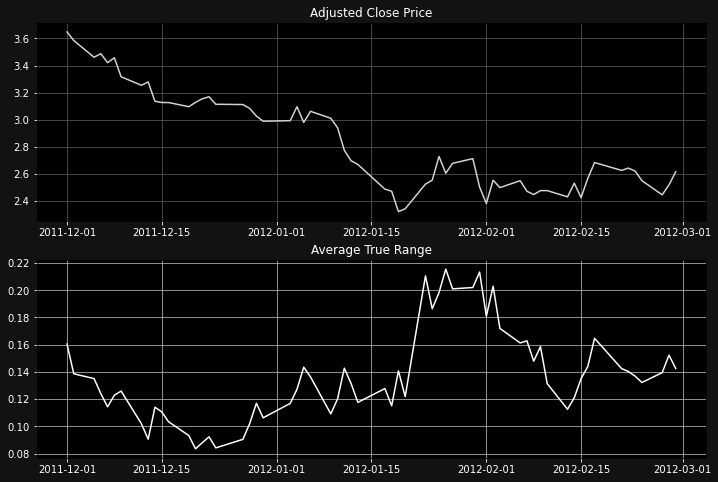

In [119]:
# plot price and ATR data for 12/01/2010 - 3/28/2011


plt.figure(figsize=(12,8))

## natural gas futures prices plot
ax1 = plt.subplot(211)
ax1.plot(winter_11_12['Date'], winter_11_12['Adj_Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color ="white")

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')


# 14 day ATR plot
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(winter_11_12['Date'], winter_11_12['ATR'], color='white')



ax2.set_title('Average True Range', color='white')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')


##################

plt.show()

In [120]:
#convert from date time to string
winter_11_12 = winter_11_12.copy()
winter_11_12["Date"] = winter_11_12["Date"].astype("str")


In [121]:
# change 'Date' to index
# winter_11_12 = winter_11_12.set_index('Date')
# winter_11_12

In [123]:
# export JSON file
winter_11_12.to_json(r'Price_data\ATR_11_12.json')

In [124]:
############ 2012 - 2013 #############

In [125]:
# filter price/ATR data
winter_12_13 = merged_df.loc[(merged_df['Date'] >= '2012-12-01') & (merged_df['Date'] < '2013-03-01')]
winter_12_13

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
504,2012-12-03,3.553,3.643,3.526,3.591,3.591,135669,0.131007
505,2012-12-04,3.611,3.611,3.525,3.539,3.539,103428,0.116005
506,2012-12-05,3.547,3.719,3.507,3.700,3.700,148134,0.148003
507,2012-12-06,3.690,3.748,3.614,3.666,3.666,183559,0.143335
508,2012-12-07,3.640,3.684,3.539,3.551,3.551,164022,0.143890
509,2012-12-10,3.519,3.520,3.415,3.460,3.460,189998,0.130927
510,2012-12-11,3.426,3.494,3.391,3.412,3.412,181126,0.121618
511,2012-12-12,3.423,3.447,3.366,3.382,3.382,187101,0.108079
512,2012-12-13,3.395,3.407,3.293,3.347,3.347,228082,0.110052
513,2012-12-14,3.339,3.363,3.261,3.314,3.314,147815,0.107368


In [126]:
#convert from date time to string
winter_12_13 = winter_12_13.copy()
winter_12_13["Date"] = winter_12_13["Date"].astype("str")


In [127]:
# change 'Date' to index
# winter_12_13 = winter_12_13.set_index('Date')
# winter_12_13

In [128]:
# export JSON file
winter_12_13.to_json(r'Price_data\ATR_12_13.json')

In [129]:
############ 2013 - 2014 #############

In [130]:
# filter price/ATR data
winter_13_14 = merged_df.loc[(merged_df['Date'] >= '2013-12-01') & (merged_df['Date'] < '2014-03-01')]
winter_13_14

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
755,2013-12-02,3.911,3.993,3.897,3.988,3.988,129861,0.095934
756,2013-12-03,3.975,4.017,3.945,3.976,3.976,130050,0.087956
757,2013-12-04,3.980,4.013,3.953,3.960,3.960,104509,0.078637
758,2013-12-05,3.965,4.152,3.951,4.132,4.132,247404,0.119425
759,2013-12-06,4.144,4.199,4.103,4.114,4.114,218988,0.111617
...,...,...,...,...,...,...,...,...
811,2014-02-24,6.300,6.493,5.380,5.445,5.445,116688,0.683579
812,2014-02-25,5.464,5.492,4.788,5.096,5.096,81451,0.690386
813,2014-02-26,4.957,5.005,4.660,4.855,4.855,166416,0.575258
814,2014-02-27,4.522,4.567,4.441,4.511,4.511,133093,0.425505


In [131]:
#convert from date time to string
winter_13_14 = winter_13_14.copy()
winter_13_14["Date"] = winter_13_14["Date"].astype("str")


In [132]:
# change 'Date' to index
# winter_13_14 = winter_13_14.set_index('Date')
#winter_13_14

In [133]:
# export JSON file
winter_13_14.to_json(r'Price_data\ATR_13_14.json')

In [134]:
############ 2014 - 2015 #############

In [135]:
# filter price/ATR data
winter_14_15 = merged_df.loc[(merged_df['Date'] >= '2014-12-01') & (merged_df['Date'] < '2015-03-01')]
winter_14_15

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
1006,2014-12-01,3.975,4.041,3.928,4.007,4.007,181558,0.205936
1007,2014-12-02,4.023,4.026,3.856,3.874,3.874,144382,0.193957
1008,2014-12-03,3.863,3.866,3.757,3.805,3.805,131446,0.165638
1009,2014-12-04,3.787,3.808,3.638,3.649,3.649,143648,0.167092
1010,2014-12-05,3.676,3.824,3.664,3.802,3.802,162625,0.169728
...,...,...,...,...,...,...,...,...
1062,2015-02-23,2.963,3.039,2.845,2.879,2.879,64988,0.167038
1063,2015-02-24,2.869,2.972,2.827,2.902,2.902,79658,0.159692
1064,2015-02-25,2.922,2.966,2.852,2.894,2.894,123448,0.144461
1065,2015-02-26,2.875,2.888,2.689,2.697,2.697,161322,0.162641


In [136]:
#convert from date time to string
winter_14_15 = winter_14_15.copy()
winter_14_15["Date"] = winter_14_15["Date"].astype("str")


In [137]:
# change 'Date' to index
# winter_14_15 = winter_14_15.set_index('Date')
#winter_14_15

In [138]:
# export JSON file
winter_14_15.to_json(r'Price_data\ATR_14_15.json')

In [139]:
############ 2015 - 2016 #############

In [140]:
# filter price/ATR data
winter_15_16 = merged_df.loc[(merged_df['Date'] >= '2015-12-01') & (merged_df['Date'] < '2016-03-01')]
winter_15_16

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
1258,2015-12-01,2.230,2.259,2.193,2.231,2.231,140269,0.087820
1259,2015-12-02,2.221,2.225,2.151,2.165,2.165,133512,0.083213
1260,2015-12-03,2.174,2.200,2.131,2.181,2.181,143065,0.078475
1261,2015-12-04,2.198,2.211,2.167,2.186,2.186,85242,0.066984
1262,2015-12-07,2.159,2.162,2.060,2.067,2.067,188741,0.078656
...,...,...,...,...,...,...,...,...
1314,2016-02-23,1.832,1.848,1.773,1.782,1.782,54649,0.074730
1315,2016-02-24,1.785,1.808,1.761,1.778,1.778,41977,0.065486
1316,2016-02-25,1.773,1.776,1.682,1.711,1.711,159634,0.074991
1317,2016-02-26,1.786,1.805,1.731,1.791,1.791,115553,0.081327


In [141]:
#convert from date time to string
winter_15_16 = winter_15_16.copy()
winter_15_16["Date"] = winter_15_16["Date"].astype("str")


In [142]:
# change 'Date' to index
# winter_15_16 = winter_15_16.set_index('Date')
#winter_15_16

In [143]:
# export JSON file
winter_15_16.to_json(r'Price_data\ATR_15_16.json')

In [144]:
############ 2016 - 2017 #############

In [145]:
# filter price/ATR data
winter_16_17 = merged_df.loc[(merged_df['Date'] >= '2016-12-01') & (merged_df['Date'] < '2017-03-01')]
winter_16_17

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
1509,2016-12-01,3.348,3.547,3.316,3.505,3.505,210764,0.157905
1510,2016-12-02,3.539,3.568,3.378,3.436,3.436,168563,0.168603
1511,2016-12-05,3.471,3.656,3.450,3.654,3.654,192188,0.185735
1512,2016-12-06,3.600,3.732,3.574,3.635,3.635,225250,0.176490
1513,2016-12-07,3.633,3.748,3.556,3.603,3.603,252203,0.181660
1514,2016-12-08,3.569,3.730,3.503,3.695,3.695,233852,0.196773
1515,2016-12-09,3.710,3.777,3.661,3.746,3.746,206662,0.169849
1516,2016-12-12,3.583,3.601,3.472,3.507,3.507,245756,0.156233
1517,2016-12-13,3.525,3.577,3.448,3.474,3.474,163184,0.147155
1518,2016-12-14,3.477,3.572,3.444,3.540,3.540,140162,0.140770


In [146]:
#convert from date time to string
winter_16_17 = winter_16_17.copy()
winter_16_17["Date"] = winter_16_17["Date"].astype("str")


In [147]:
# change 'Date' to index
# winter_16_17 = winter_16_17.set_index('Date')
#winter_16_17

In [148]:
# export JSON file
winter_16_17.to_json(r'Price_data\ATR_16_17.json')

In [149]:
############ 2017 - 2018 #############

In [150]:
# filter price/ATR data
winter_17_18 = merged_df.loc[(merged_df['Date'] >= '2017-12-01') & (merged_df['Date'] < '2018-03-01')]
winter_17_18

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
1761,2017-12-01,3.032,3.117,3.029,3.061,3.061,213443,0.133891
1762,2017-12-04,3.091,3.127,2.953,2.985,2.985,238226,0.147261
1763,2017-12-05,2.976,2.998,2.875,2.914,2.914,240838,0.139174
1764,2017-12-06,2.910,2.961,2.884,2.922,2.922,178775,0.118449
1765,2017-12-07,2.910,2.922,2.747,2.763,2.763,392520,0.137300
1766,2017-12-08,2.769,2.820,2.757,2.772,2.772,233766,0.112533
1767,2017-12-11,2.831,2.848,2.793,2.828,2.828,196702,0.100355
1768,2017-12-12,2.801,2.844,2.673,2.678,2.678,312864,0.123904
1769,2017-12-13,2.696,2.751,2.656,2.715,2.715,256783,0.114269
1770,2017-12-14,2.704,2.717,2.643,2.684,2.684,205087,0.100846


In [151]:
#convert from date time to string
winter_17_18 = winter_17_18.copy()
winter_17_18["Date"] = winter_17_18["Date"].astype("str")


In [152]:
# change 'Date' to index
# winter_17_18 = winter_17_18.set_index('Date')
#winter_17_18

In [153]:
# export JSON file
winter_17_18.to_json(r'Price_data\ATR_17_18.json')

In [154]:
############ 2018 - 2019 #############

In [155]:
# filter price/ATR data
winter_18_19 = merged_df.loc[(merged_df['Date'] >= '2018-12-01') & (merged_df['Date'] < '2019-03-01')]
winter_18_19

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
2013,2018-12-03,4.527,4.536,4.243,4.339,4.339,190568,0.324090
2014,2018-12-04,4.392,4.574,4.358,4.457,4.457,159868,0.294393
2015,2018-12-06,4.450,4.489,4.271,4.327,4.327,132563,0.268929
2016,2018-12-07,4.348,4.570,4.231,4.488,4.488,182159,0.292286
2017,2018-12-10,4.590,4.666,4.390,4.545,4.545,190053,0.286857
2018,2018-12-11,4.507,4.587,4.348,4.407,4.407,175748,0.270905
2019,2018-12-12,4.363,4.407,4.081,4.136,4.136,198284,0.289270
2020,2018-12-13,4.096,4.307,4.050,4.124,4.124,193403,0.278513
2021,2018-12-14,4.073,4.094,3.787,3.827,3.827,163126,0.288009
2022,2018-12-17,3.620,3.742,3.516,3.528,3.528,142406,0.267339


In [156]:
#convert from date time to string
winter_18_19 = winter_18_19.copy()
winter_18_19["Date"] = winter_18_19["Date"].astype("str")


In [157]:
# change 'Date' to index
# winter_18_19 = winter_18_19.set_index('Date')
#winter_18_19

In [158]:
# export JSON file
winter_18_19.to_json(r'Price_data\ATR_18_19.json')

In [159]:
############ 2019 - 2020 #############

In [160]:
# filter price/ATR data
winter_19_20 = merged_df.loc[(merged_df['Date'] >= '2019-12-01') & (merged_df['Date'] < '2020-03-01')]
winter_19_20

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
2263,2019-12-02,2.315,2.369,2.289,2.329,2.329,219035,0.132700
2264,2019-12-03,2.345,2.510,2.340,2.441,2.441,307305,0.148800
2265,2019-12-04,2.439,2.463,2.368,2.399,2.399,195334,0.130867
2266,2019-12-05,2.406,2.463,2.396,2.427,2.427,179532,0.109578
2267,2019-12-06,2.417,2.437,2.328,2.334,2.334,251411,0.109385
...,...,...,...,...,...,...,...,...
2319,2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.072027
2320,2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.062352
2321,2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.064901
2322,2020-02-27,1.828,1.831,1.719,1.752,1.752,276100,0.080601


In [161]:
#convert from date time to string
winter_19_20 = winter_19_20.copy()
winter_19_20["Date"] = winter_19_20["Date"].astype("str")


In [162]:
# change 'Date' to index
# winter_19_20 = winter_19_20.set_index('Date')
#winter_19_20

In [163]:
# export JSON file
winter_19_20.to_json(r'Price_data\ATR_19_20.json')

In [164]:
#Function to convert dataframes to dictionaries
def get_naturalgas_dict(dataframe):
    naturalgas_dict = dataframe.to_dict(orient='records')
    return naturalgas_dict

In [165]:
#Convert all natural gas dataframes to dictionaries
winter_11_12_dict = get_naturalgas_dict(winter_11_12)
winter_12_13_dict = get_naturalgas_dict(winter_12_13)
winter_13_14_dict = get_naturalgas_dict(winter_13_14)
winter_14_15_dict = get_naturalgas_dict(winter_14_15)
winter_15_16_dict = get_naturalgas_dict(winter_15_16)
winter_16_17_dict = get_naturalgas_dict(winter_16_17)
winter_17_18_dict = get_naturalgas_dict(winter_17_18)
winter_18_19_dict = get_naturalgas_dict(winter_18_19)
winter_19_20_dict = get_naturalgas_dict(winter_19_20)

In [166]:
#Create dictionary to hold all datasets to export
naturalgas_datasets = {
    'winter_11_12': winter_11_12_dict,
    'winter_12_13': winter_12_13_dict,
    'winter_13_14': winter_13_14_dict,
    'winter_14_15': winter_14_15_dict,
    'winter_15_16': winter_15_16_dict,
    'winter_16_17': winter_16_17_dict,    
    'winter_17_18': winter_17_18_dict,
    'winter_18_19': winter_18_19_dict,
    'winter_19_20': winter_19_20_dict,
}

In [167]:
naturalgas_datasets

{'winter_11_12': [{'Date': '2011-12-01',
   'Open': 3.575000047683716,
   'High': 3.688999891281128,
   'Low': 3.5409998893737793,
   'Close': 3.6480000019073486,
   'Adj_Close': 3.6480000019073486,
   'Volume': 175649,
   'ATR': 0.16047676223442128},
  {'Date': '2011-12-02',
   'Open': 3.6440000534057617,
   'High': 3.6630001068115234,
   'Low': 3.568000078201294,
   'Close': 3.5840001106262207,
   'Adj_Close': 3.5840001106262207,
   'Volume': 84298,
   'ATR': 0.13865118435969068},
  {'Date': '2011-12-05',
   'Open': 3.569999933242798,
   'High': 3.572000026702881,
   'Low': 3.444000005722046,
   'Close': 3.4609999656677246,
   'Adj_Close': 3.4609999656677246,
   'Volume': 114253,
   'ATR': 0.13510079656673876},
  {'Date': '2011-12-06',
   'Open': 3.4630000591278076,
   'High': 3.506999969482422,
   'Low': 3.4049999713897705,
   'Close': 3.486999988555908,
   'Adj_Close': 3.486999988555908,
   'Volume': 122829,
   'ATR': 0.12406719707537629},
  {'Date': '2011-12-07',
   'Open': 3.4969

In [170]:
def export_data_to_json(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

def export_datasets(datasets):
    data_folder = 'futures'

    # Create 'data' folder if it doesn't exist
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)

    for dataset_name, dataset in datasets.items():
        filename = os.path.join(data_folder, f"{dataset_name}_data.json")
        export_data_to_json(dataset, filename)

In [171]:
export_datasets(naturalgas_datasets)